# Effet Prix et Revenu avec préférences CES

In [3]:
import numpy as np 
from matplotlib import pyplot as plt 


La fonction d'utilité est: 
$$u(X,Y) = \left(X^{\rho} + Y^{\rho} \right)^{\tfrac{1}{\rho}} $$

Programmons quelques unes des fonctions nécessaires

In [4]:
def u(x,y,rho):
    sub = (x**rho) + (y**rho)
    return sub**(1/rho)
def mu_x(x,y,rho):
    sub = (x**rho) + (y**rho)
    return (1/rho)*(sub**(1/rho-1))*rho*(x**(rho-1.0))
def mu_y(x,y,rho):
    sub = (x**rho) + (y**rho)
    return (1/rho)*(sub**(1/rho-1))*rho*(y**(rho-1.0))
def tms(x,y,rho):
    return - (x/y)**(rho-1.0)
def indf(v,x,rho):
    return (v**rho - x**rho)**(1/rho)


Trouvons les fonctions de demande:   $|TMS| = \tfrac{p_X}{p_Y}$. Donc, 

$$ \frac{X}{Y} = \left(\frac{p_X}{p_Y}\right)^{\tfrac{1}{\rho-1}} $$

En utilisant la contrainte budgétaire :

$$ p_X \left(\frac{p_X}{p_Y}\right)^{\tfrac{1}{\rho-1}}Y + p_Y Y = I $$

Donc, en dénotant $r = \frac{\rho}{\rho-1}$ nous obtenons: 

$$ \left(p_X^r p_Y^{1-r} + p_Y \right) Y = I $$



$$ Y^* = \frac{p_Y^{r-1}}{ p_X^r + p_Y^r }I $$

et


$$ X^* = \frac{p_X^{r-1}}{ p_X^r + p_Y^r }I $$

Programmons ces fonctions ainsi que l'utilité indirecte


In [5]:
def xstar(px,py,I,rho):
  r = rho/(rho-1)
  return (px**(r-1)/(px**r + py**r))*I 
def ystar(px,py,I,rho):
  r = rho/(rho-1)
  return (py**(r-1)/(px**r + py**r))*I 
def vstar(px,py,I,rho):
  x = xstar(px,py,I,rho)
  y = ystar(px,py,I,rho)
  return u(x,y,rho)


Maintenant fixons des paramètres (que nous pourrons changer)

In [6]:
px = 1
py = 1
I = 100
px_hat = 2
rho = 0.5

Trouvons les demandes aux prix de référence

In [7]:
xref,yref = xstar(px,py,I,rho),ystar(px,py,I,rho)

Et l'utilité aux prix de référence

In [8]:
vref = vstar(px,py,I,rho)

Faisons la même chose aux nouveaux prix:

In [9]:
xhat,yhat = xstar(px_hat,py,I,rho),ystar(px_hat,py,I,rho)

In [10]:
vhat = vstar(px_hat,py,I,rho)

Regardons pour des niveaux de revenus différents, l'utilité indirecte aux nouveaux prix. Ca nous donnera une idée du niveau de revenu nécessaire pour obtenir le niveau d'utilité de référence. 

In [11]:
Is = np.linspace(50,200,100)

In [12]:
vhats = [vstar(px_hat,py,i,rho) for i in Is]

Faisons un graphique. On voit que quelque part entre 120 et 140 se trouve notre revenu compensé. 


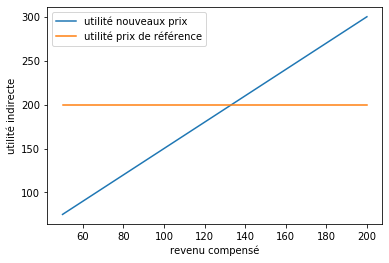

In [13]:
plt.figure()
plt.plot(Is,vhats,label='utilité nouveaux prix')
plt.plot(Is,vref*np.ones(100),label='utilité prix de référence')
plt.xlabel('revenu compensé')
plt.ylabel('utilité indirecte')
plt.legend()
plt.show()

Afin de trouver le niveau exacte, sans utiliser de solution analytique, nous allons définir une fonction qui donne la différence d'utilité indirecte aux prix de référence et nouveaux prix pour un niveau de compensation donné. 

In [14]:
def slack(cmp,px,dpx,py,I,rho):
    return vstar(px,py,I,rho) - vstar(px+dpx,py,I+cmp,rho)

On va ensuite trouver le zéro de cette fonction en choisissant la compensation (cmp). 

In [15]:
from scipy.optimize import bisect

In [16]:
bisect(slack,0,I,args=(px,px_hat-px,py,I,rho))

33.33333333333286

On trouve une compensation de 33.33. Maintenant, faisons pour différentes variation de prix (on avait +1). Ca nous donnera les compensations nécessaires. On pourra comparer à la compensation approximative. 

In [17]:
dpxs = np.linspace(-0.5,1,100)
cmps = [bisect(slack,-I,I,args=(px,dpx,py,I,rho)) for dpx in dpxs]
cmp_approx = dpxs * xstar(px,py,I,rho)

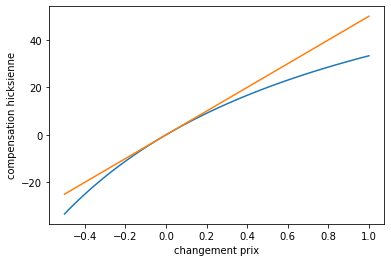

In [18]:
plt.figure()
plt.plot(dpxs,cmps,label='exacte')
plt.plot(dpxs,cmp_approx,label='approximation')
plt.xlabel('changement prix')
plt.ylabel('compensation hicksienne')
plt.show()

Maintenant amusons-nous à faire un graphique de choix du consommateur avec variation de prix. Commençons par la situation de référence

In [19]:
xs = np.linspace(0,I/px)
budget_ref = I/py - px/py * xs

Rajoutons la courbe d'indifférence au niveau d'utilité du panier de référence

In [21]:
udif_ref = indf(vref,xs,rho)

Maintenant, avec les nouveaux prix

In [25]:
budget_hat = I/py - px_hat/py * xs
udif_hat = indf(vhat,xs,rho)

Et maintenant la situation compensée

In [32]:
Icmp = I + bisect(slack,0,I,args=(px,px_hat-px,py,I,rho))

In [35]:
xcmp = xstar(px_hat,py,Icmp,rho)
ycmp = ystar(px_hat,py,Icmp,rho)
vcmp = vstar(px_hat,py,Icmp,rho)
xcmp,ycmp,vcmp,vref

(22.222222222222143, 88.88888888888857, 199.99999999999926, 200.00000000000003)

In [38]:
budget_cmp = Icmp/py - px_hat/py*xs
udif_cmp = indf(vcmp,xs,rho)

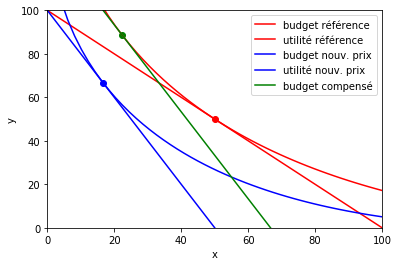

In [41]:
plt.figure()
plt.plot(xs,budget_ref,label='budget référence',color='r')
plt.plot(xs,udif_ref,label='utilité référence',color='r')
plt.scatter(xref,yref,color='r')
plt.plot(xs,budget_hat,label='budget nouv. prix',color='b')
plt.plot(xs,udif_hat,label='utilité nouv. prix',color='b')
plt.scatter(xhat,yhat,color='b')
plt.plot(xs,budget_cmp,label='budget compensé',color='g')
plt.scatter(xcmp,ycmp,color='g')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([0, I/py])
plt.xlim([0, I/px])
plt.show()

Encapsulons maintenant ceci dans une fonction qui permet de le faire pour des paramètres différents

In [46]:
def equigraph(px,py,I,dpx,rho):
    xs = np.linspace(0,I/px)
    budget_ref = I/py - px/py * xs
    xref, yref = xstar(px,py,I,rho), ystar(px,py,I,rho)
    vref = vstar(px,py,I,rho)
    udif_ref = indf(vref,xs,rho)
    px_hat = px + dpx
    budget_hat = I/py - px_hat/py * xs
    xhat, yhat = xstar(px_hat,py,I,rho), ystar(px_hat,py,I,rho)
    vhat = vstar(px_hat,py,I,rho)
    udif_hat = indf(vhat,xs,rho)
    Icmp = I + bisect(slack,-I,I,args=(px,dpx,py,I,rho))
    xcmp, ycmp = xstar(px_hat,py,Icmp,rho), ystar(px_hat,py,Icmp,rho)
    vcmp = vstar(px_hat,py,Icmp,rho)
    budget_cmp = Icmp/py - px_hat/py*xs
    plt.figure()
    plt.plot(xs,budget_ref,label='budget référence',color='r')
    plt.plot(xs,udif_ref,label='utilité référence',color='r')
    plt.scatter(xref,yref,color='r')
    plt.plot(xs,budget_hat,label='budget nouv. prix',color='b')
    plt.plot(xs,udif_hat,label='utilité nouv. prix',color='b')
    plt.scatter(xhat,yhat,color='b')
    plt.plot(xs,budget_cmp,label='budget compensé',color='g')
    plt.scatter(xcmp,ycmp,color='g')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim([0, I/py])
    plt.xlim([0, I/px])
    plt.show()
    return 

Une diminution de prix

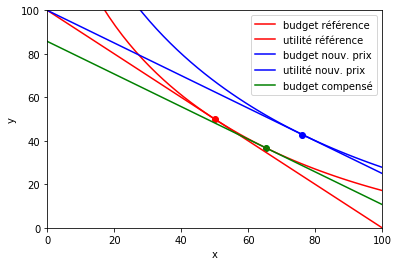

In [48]:
equigraph(1,1,100,-0.25,rho)

Un rho plus faible

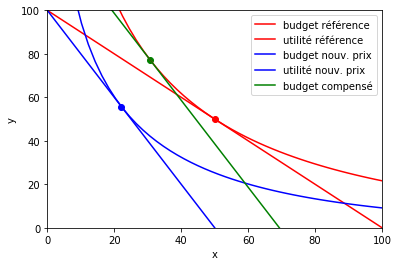

In [53]:
equigraph(1,1,100,1.0,0.25)